In [1]:
import pandas as pd
from datetime import datetime # to manually create dates
time_stamp = pd.Timestamp(datetime(2017, 1, 1))

In [2]:
time_stamp.year

2017

In [3]:
period = pd.Period('2017-01')
period

Period('2017-01', 'M')

In [4]:
period.asfreq('D') # Convert to daily

Period('2017-01-31', 'D')

In [5]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [6]:
period = pd.Period('2017-01')
period + 2

Period('2017-03', 'M')

In [7]:
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

Indexing & resampling time series

In [8]:
google_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv'
google = pd.read_csv(google_url)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [9]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<AxesSubplot: title={'center': 'Google Stock Price'}, xlabel='Date'>

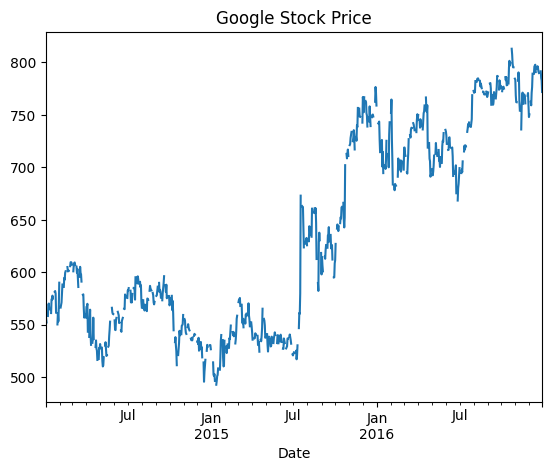

In [10]:
google.Close.plot(title='Google Stock Price')

In [11]:
google['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
/tmp/ipykernel_289/2423233360.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'].info()


In [12]:
google['2015-3': '2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [13]:
google.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [14]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [15]:
google = google.asfreq('B')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [16]:
google['shifted'] = google.Close.shift()
google.head()

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86


In [17]:
google['lagged'] = google.Close.shift(periods=-1)
google[['Close', 'lagged', 'shifted']].tail()

,Close,lagged,shifted
Date,,,
2016-12-26,NaN,791.55,789.91
2016-12-27,791.55,785.05,NaN
2016-12-28,785.05,782.79,791.55
2016-12-29,782.79,771.82,785.05
2016-12-30,771.82,NaN,782.79


In [18]:
google['change'] = google.Close.div(google.shifted)
google['return'] = google.change.sub(1).mul(100)
google[['Close', 'shifted', 'change', 'return']].head()

,Close,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,0.992716,-0.728417
2014-01-06,558.10,551.95,1.011142,1.114231
2014-01-07,568.86,558.10,1.019280,1.927970
2014-01-08,570.04,568.86,1.002074,0.207432


In [19]:
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close', 'return', 'pct_change']]

,Close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-06,558.10,1.114231,1.114231
2014-01-07,568.86,1.927970,1.927970
2014-01-08,570.04,0.207432,0.207432
...,...,...,...
2016-12-26,NaN,NaN,0.000000
2016-12-27,791.55,NaN,0.207619
2016-12-28,785.05,-0.821174,-0.821174


In [20]:
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google[['Close', 'return_3d']]

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,2.312950
2014-01-08,570.04,3.277471
...,...,...
2016-12-26,NaN,-0.585230
2016-12-27,791.55,0.036650
2016-12-28,785.05,-0.615260


# Resampling

In [21]:
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [22]:
monthly = quarterly.asfreq('M')
monthly = monthly.to_frame('baseline')
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [23]:
# Upsampling

In [24]:
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


In [25]:
# using reindex
dates = pd.date_range(start='2016', periods=12, freq='M')
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

In [26]:
# Upsampling & interpolation

In [27]:
unrate_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/monthly%20unemployment%20rate.csv'
unrate = pd.read_csv(unrate_url, parse_dates=['DATE'], index_col='DATE')
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [28]:
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [29]:
unrate.resample('MS')
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

# Downsampling & aggregation

In [30]:
ozone_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/ozone_nyc.csv'
ozone = pd.read_csv(ozone_url, parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [31]:
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [32]:
ozone.resample('M').median().head()

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


In [33]:
ozone.resample('M').agg(['mean', 'median']).head()

Ozone          
                mean    median
date                          
2000-01-31  0.010443  0.009486
2000-02-29  0.011817  0.010726
2000-03-31  0.016810  0.017004
2000-04-30  0.019413  0.019866
2000-05-31  0.026535  0.026018

<AxesSubplot: xlabel='date'>

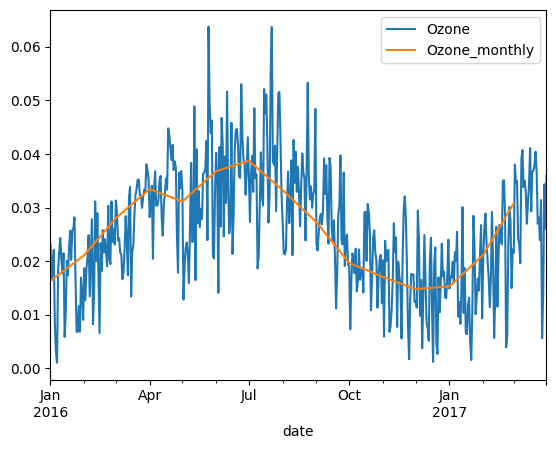

In [34]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

# Window Functions: Rolling & Expanding Metrics

In [35]:
google.rolling(window=30, min_periods=1).mean()

,Close,shifted,lagged,change,return,pct_change,return_3d
Date,,,,,,,
2014-01-02,556.000000,NaN,551.950000,NaN,NaN,NaN,NaN
2014-01-03,553.975000,556.000000,555.025000,0.992716,-0.728417,-0.728417,NaN
2014-01-06,555.350000,553.975000,559.636667,1.001929,0.192907,0.192907,NaN
2014-01-07,558.727500,555.350000,562.237500,1.007713,0.771261,0.771261,2.312950
2014-01-08,560.990000,558.727500,562.700000,1.006303,0.630304,0.630304,2.795210
...,...,...,...,...,...,...,...
2016-12-26,775.228214,773.878276,776.408929,1.002637,0.263732,0.240381,0.528145
2016-12-27,776.408929,775.228214,777.143571,1.001568,0.156779,0.145818,0.547157
2016-12-28,777.143571,776.408929,777.556429,1.000948,0.094822,0.092122,0.480407


In [36]:
google.rolling(window='30D').mean()

,Close,shifted,lagged,change,return,pct_change,return_3d
Date,,,,,,,
2014-01-02,556.000000,NaN,551.950000,NaN,NaN,NaN,NaN
2014-01-03,553.975000,556.000000,555.025000,0.992716,-0.728417,-0.728417,NaN
2014-01-06,555.350000,553.975000,559.636667,1.001929,0.192907,0.192907,NaN
2014-01-07,558.727500,555.350000,562.237500,1.007713,0.771261,0.771261,2.312950
2014-01-08,560.990000,558.727500,562.700000,1.006303,0.630304,0.630304,2.795210
...,...,...,...,...,...,...,...
2016-12-26,779.575500,778.723333,780.741000,1.001860,0.185975,0.177119,0.551314
2016-12-27,780.145714,778.723333,780.946190,1.001860,0.185975,0.178505,0.527920
2016-12-28,780.946190,780.145714,781.515238,1.001019,0.101854,0.102031,0.456649


<AxesSubplot: xlabel='Date'>

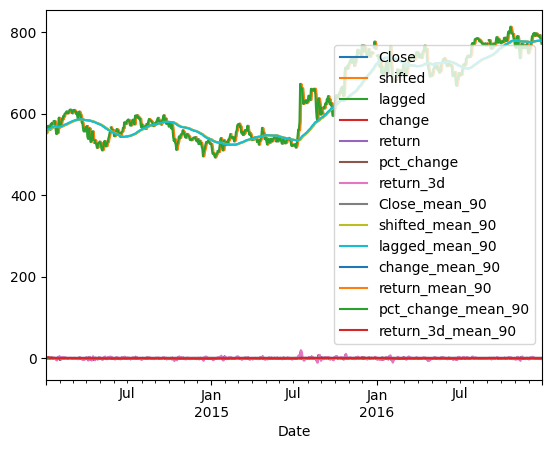

In [37]:
r90 = google.rolling(window='90D').mean()
google.join(r90.add_suffix('_mean_90')).plot()

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

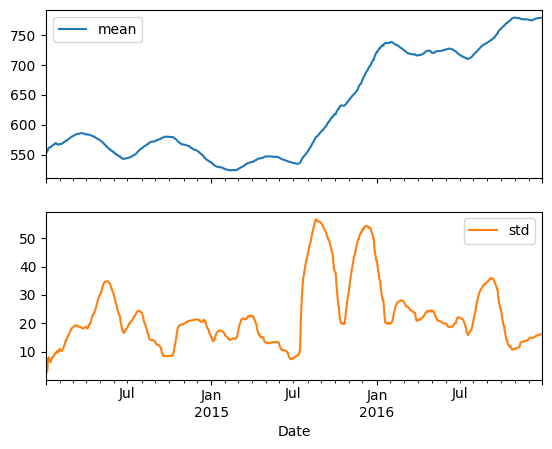

In [38]:
r = google.Close.rolling('90D').agg(['mean', 'std'])
r.plot(subplots = True)


<AxesSubplot: xlabel='Date'>

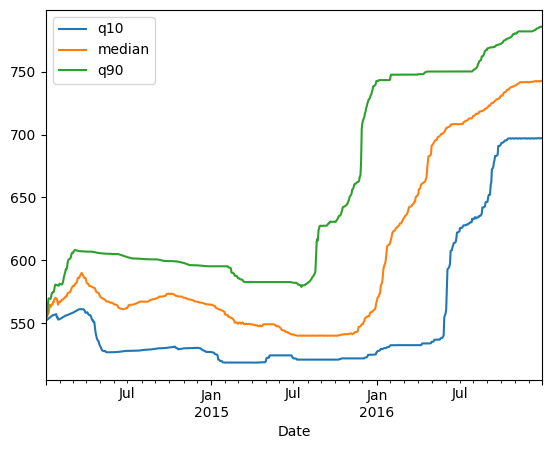

In [39]:
rolling = google.Close.rolling('360D')
q10 = rolling.quantile(0.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90 = rolling.quantile(0.9).to_frame('q90')
pd.concat([q10, median, q90], axis=1).plot()

<AxesSubplot: >

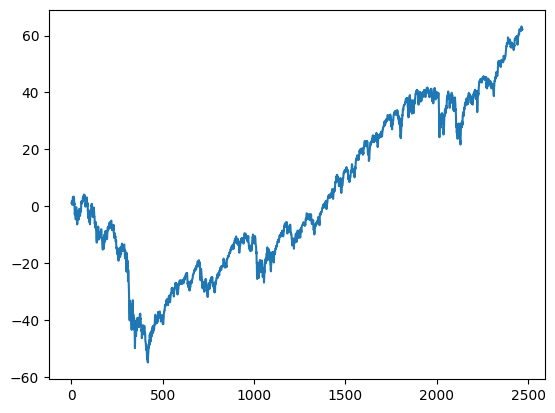

In [40]:
price_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/price.csv'
data = pd.read_csv(price_url)
pr = data.SP500.pct_change()
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

In [41]:
google

,Close,shifted,lagged,change,return,pct_change,return_3d
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417,-0.728417,NaN
2014-01-06,558.10,551.95,568.86,1.011142,1.114231,1.114231,NaN
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,1.927970,2.312950
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,0.207432,3.277471
...,...,...,...,...,...,...,...
2016-12-26,NaN,789.91,791.55,NaN,NaN,0.000000,-0.585230
2016-12-27,791.55,NaN,785.05,NaN,NaN,0.207619,0.036650
2016-12-28,785.05,791.55,782.79,0.991788,-0.821174,-0.821174,-0.615260


<AxesSubplot: >

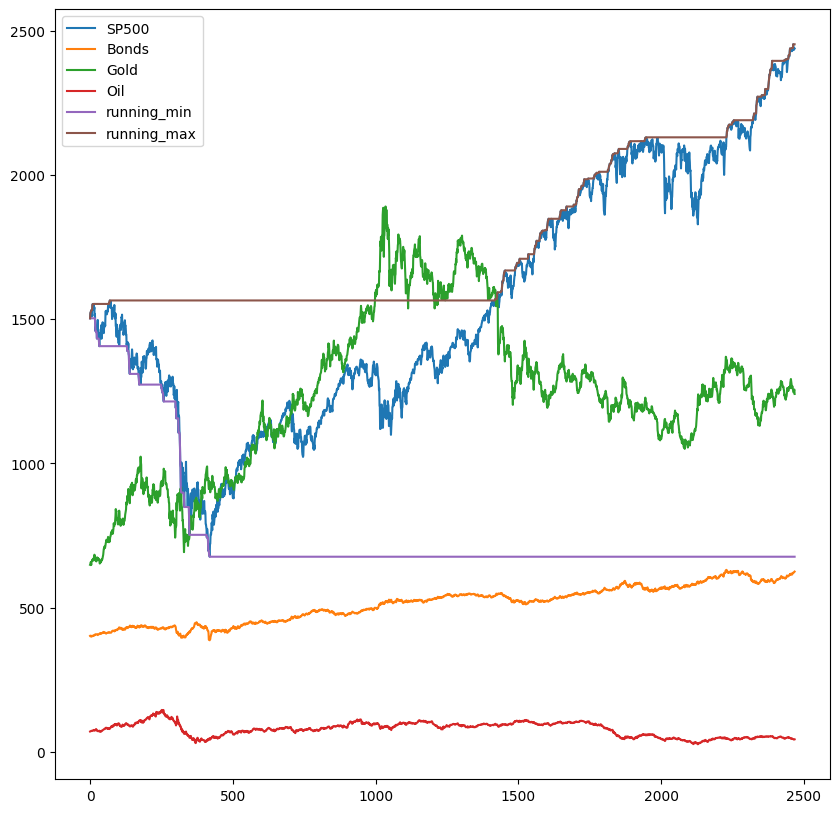

In [42]:
data['running_min'] = data.SP500.expanding().min()
data['running_max'] = data.SP500.expanding().max()
data.plot(figsize=(10,10))

In [43]:
data.head()

,DATE,SP500,Bonds,Gold,Oil,running_min,running_max
0,2007-06-29,1503.35,402.15,648.50,70.47,1503.35,1503.35
1,2007-07-02,1519.43,402.96,650.50,71.11,1503.35,1519.43
2,2007-07-03,1524.87,402.02,657.25,71.41,1503.35,1524.87
3,2007-07-05,1525.40,400.15,655.90,71.81,1503.35,1525.40
4,2007-07-06,1530.44,399.31,647.75,72.80,1503.35,1530.44


/tmp/ipykernel_289/1010465373.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_returns, fit=norm, kde=False)


<AxesSubplot: >

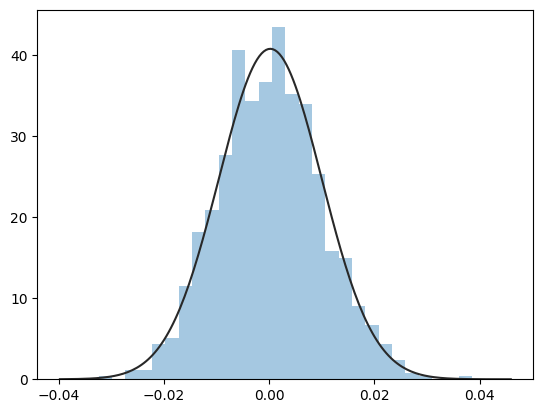

In [44]:
import seaborn as sns
from numpy.random import normal, seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)

<AxesSubplot: >

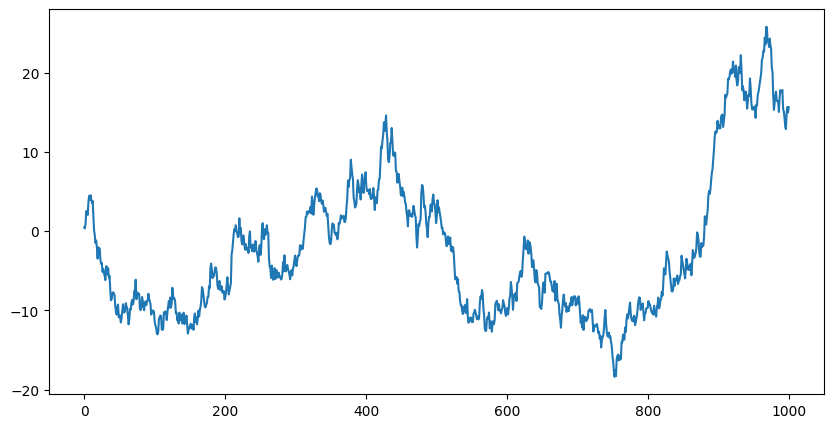

In [45]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot(figsize=((10,5)))

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

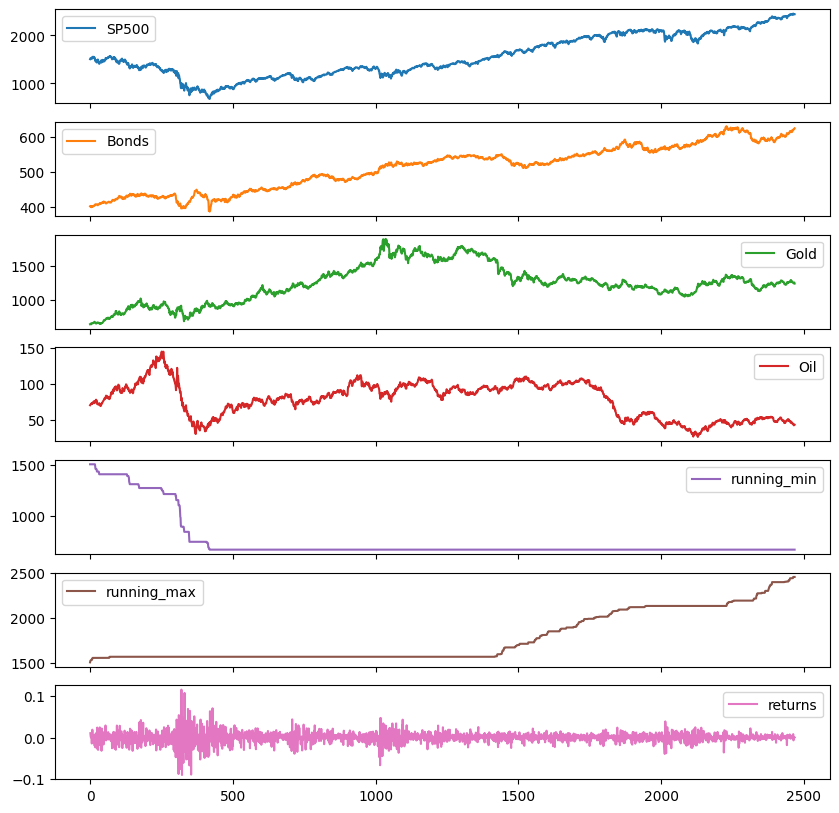

In [46]:
data['returns'] = data.SP500.pct_change()
data.plot(subplots=True, figsize=(10,10))

In [47]:
from numpy.random import choice

sample = data.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, size=n_obs)
random_walk =  pd.Series(random_walk, index=sample.index)
random_walk.head()

1   -0.017852
2   -0.019769
3   -0.013852
4    0.001196
5    0.007319
dtype: float64

# Correlation

In [48]:
data

,DATE,SP500,Bonds,Gold,Oil,running_min,running_max,returns
0,2007-06-29,1503.35,402.15,648.50,70.47,1503.35,1503.35,NaN
1,2007-07-02,1519.43,402.96,650.50,71.11,1503.35,1519.43,0.010696
2,2007-07-03,1524.87,402.02,657.25,71.41,1503.35,1524.87,0.003580
3,2007-07-05,1525.40,400.15,655.90,71.81,1503.35,1525.40,0.000348
4,2007-07-06,1530.44,399.31,647.75,72.80,1503.35,1530.44,0.003304
...,...,...,...,...,...,...,...,...
2464,2017-06-20,2437.03,621.84,1246.50,43.34,676.53,2453.46,-0.006697
2465,2017-06-21,2435.61,622.94,1247.05,42.48,676.53,2453.46,-0.000583
2466,2017-06-22,2434.50,622.93,1251.40,42.53,676.53,2453.46,-0.000456
2467,2017-06-23,2438.30,623.57,1256.30,42.86,676.53,2453.46,0.001561


In [49]:
dji_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/DJI.csv'
levels = pd.read_csv(dji_url, parse_dates=['Date'], index_col='Date')

In [50]:
correlation1 = levels['DJI'].corr(levels['UFO'])
print('Correlation of levels: ', correlation1)

changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print('Correlation of changes: ', correlation2)

Correlation of levels:  0.9204594155244163
Correlation of changes:  0.009287288259357323


In [51]:
import statsmodels.api as sm

data = data.dropna()
x = data['SP500']
y = data['Oil']

correlation = x.corr(y)
print('The correlation between x and y is %4.2f' %(correlation))

dfx = pd.DataFrame(x.values, columns = ['x'])
dfx1 = sm.add_constant(dfx)
result = sm.OLS(y.values, dfx1).fit()
print(result.summary())

ModuleNotFoundError: No module named 'statsmodels'

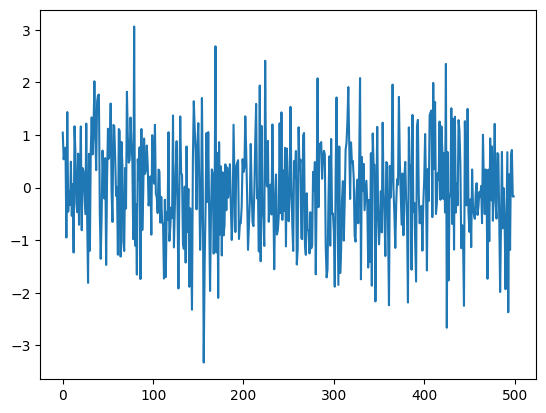

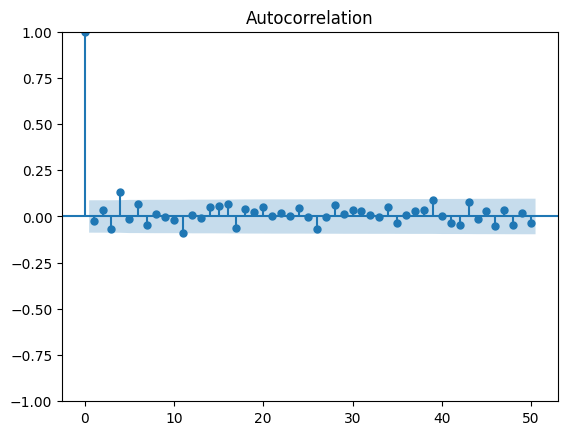

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)
plt.show()
plot_acf(noise, lags=50)
plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller
data = data.dropna()
SPX = data['SP500']
results = adfuller(SPX)
print(results[1])

0.98137532755664


Text(0.5, 1.0, 'Seasonal differnce of Amazon quarterly revenue log')

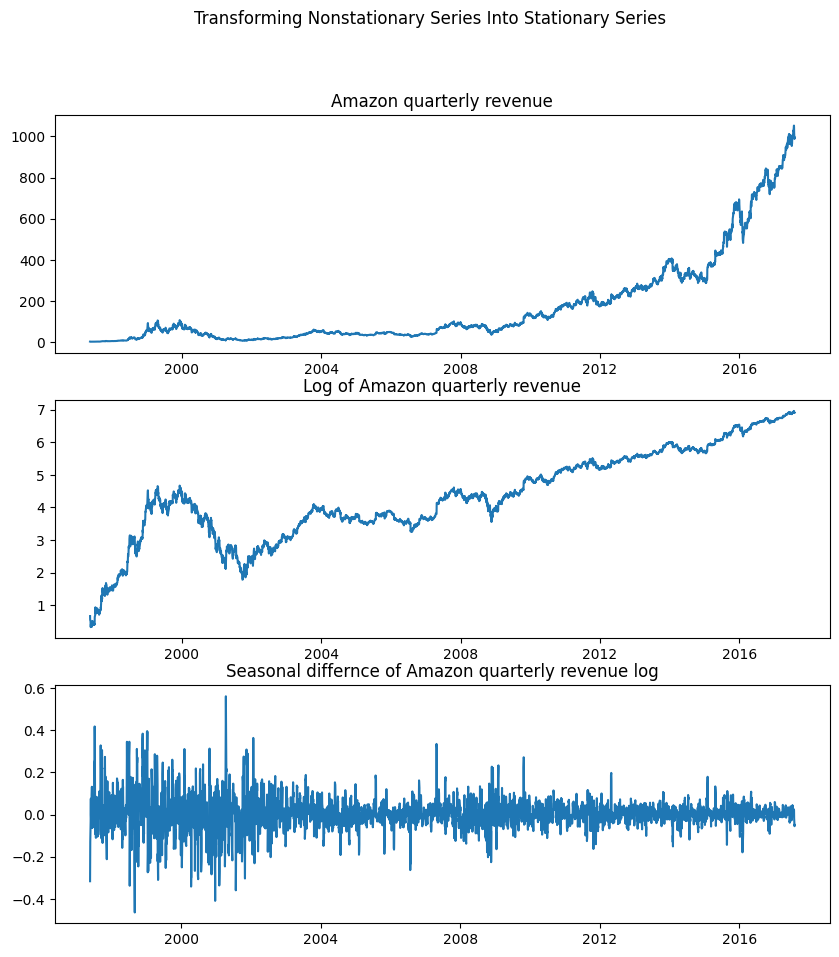

In [56]:
amazon_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Analysis/AMZN.csv'
AMZN =  pd.read_csv(amazon_url, parse_dates=['Date'], index_col='Date')

fig, axs = plt.subplots(3)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(AMZN)
axs[0].set_title('Amazon quarterly revenue')
axs[1].plot(np.log(AMZN))
axs[1].set_title('Log of Amazon quarterly revenue')

axs[2].plot(np.log(AMZN).diff(4))
axs[2].set_title('Seasonal differnce of Amazon quarterly revenue log')


Text(0.5, 1.0, 'Simulated data with Phi = -0.5')

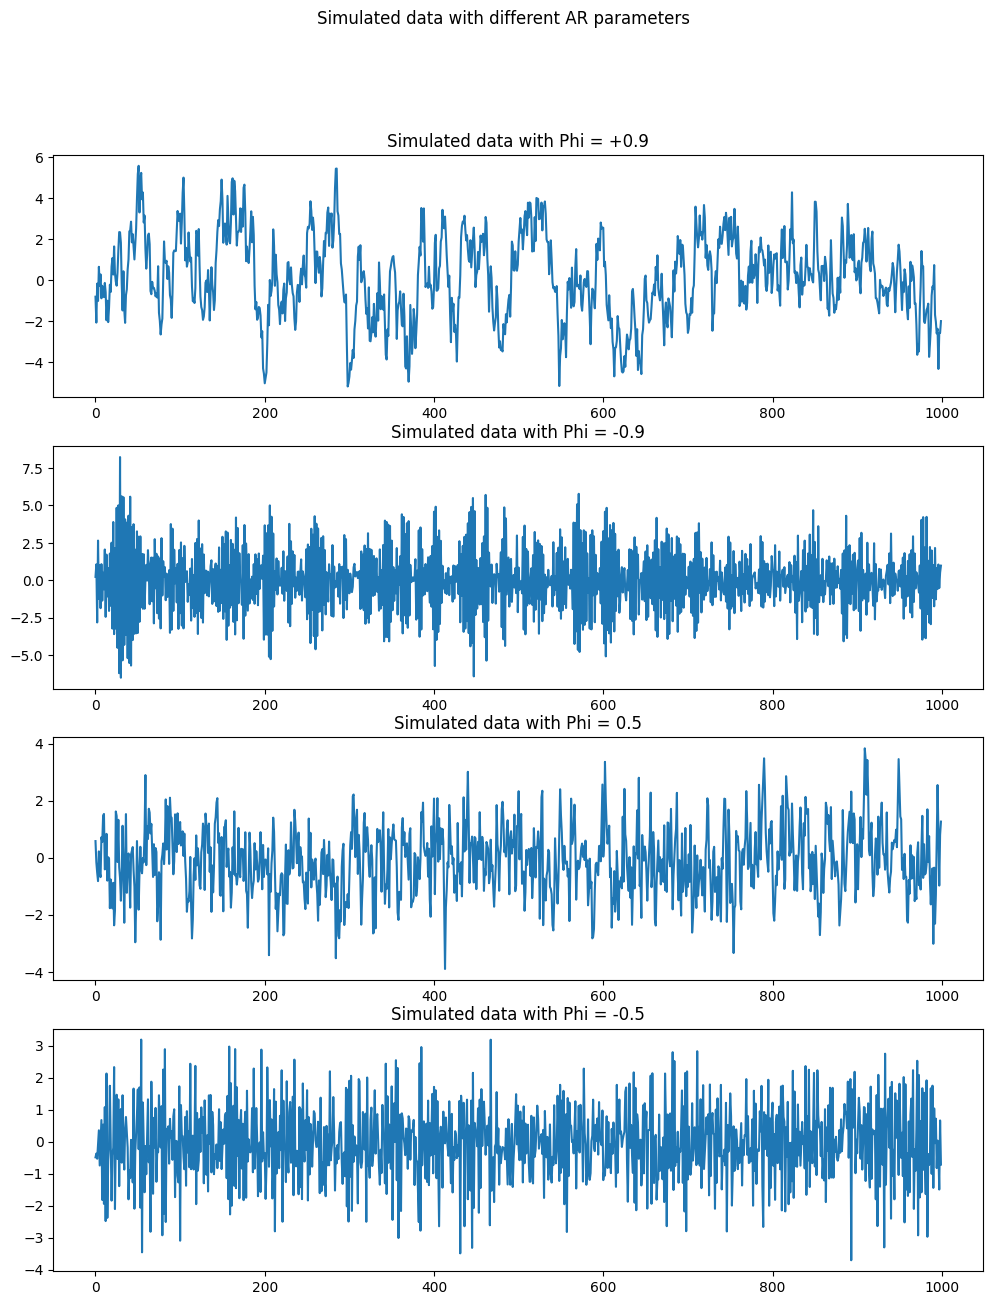

In [57]:
from statsmodels.tsa.arima_process import ArmaProcess

fig, axs = plt.subplots(4)
fig.set_size_inches(12, 14.5)
fig.suptitle('Simulated data with different AR parameters')

# Plot 1
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
axs[0].plot(simulated_data_1)
axs[0].set_title('Simulated data with Phi = +0.9')

# Plot 2
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object.generate_sample(nsample=1000)
axs[1].plot(simulated_data_2)
axs[1].set_title('Simulated data with Phi = -0.9')

# Plot 3
ar3 = np.array([1, -0.5])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
axs[2].plot(simulated_data_3)
axs[2].set_title('Simulated data with Phi = 0.5')

# Plot 4
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
axs[3].plot(simulated_data_4)
axs[3].set_title('Simulated data with Phi = -0.5')

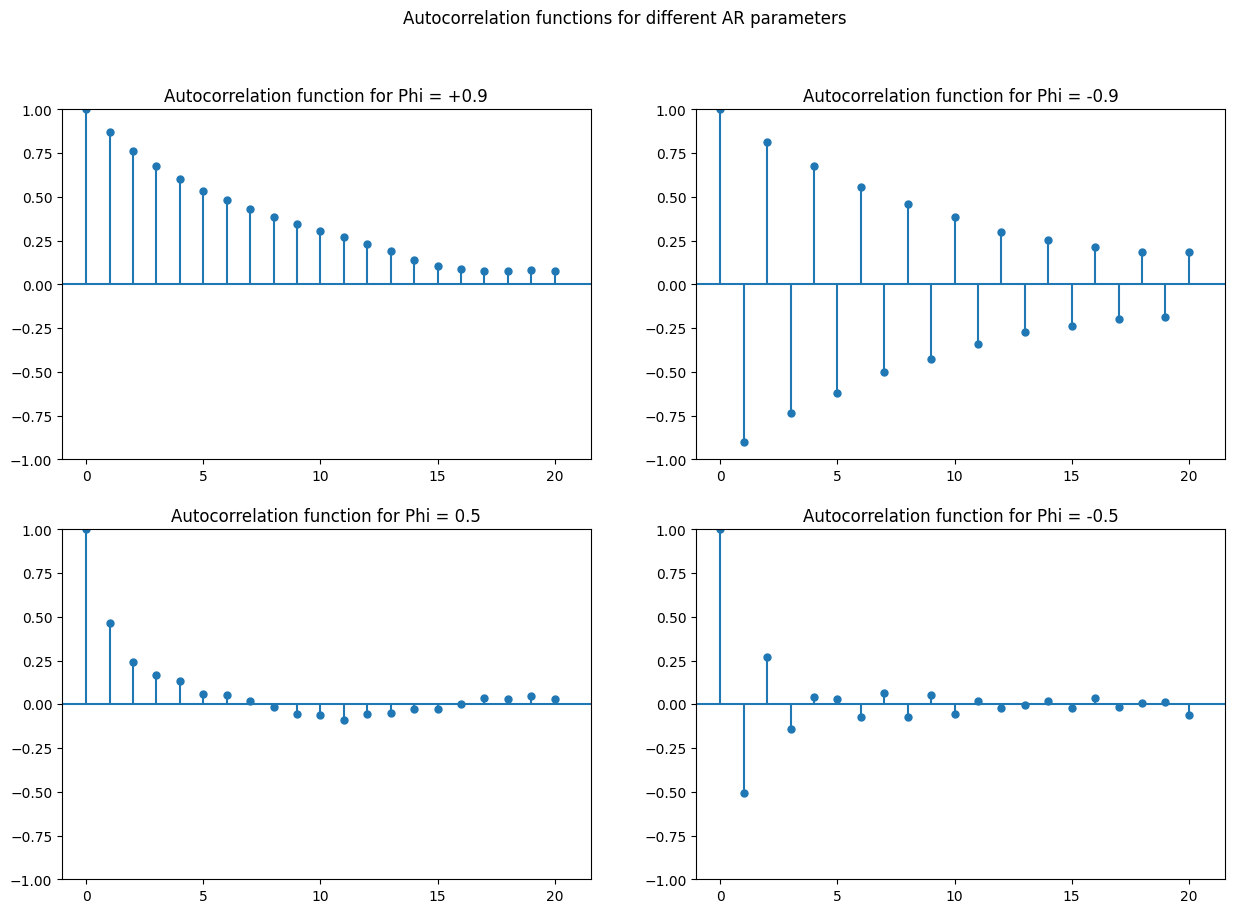

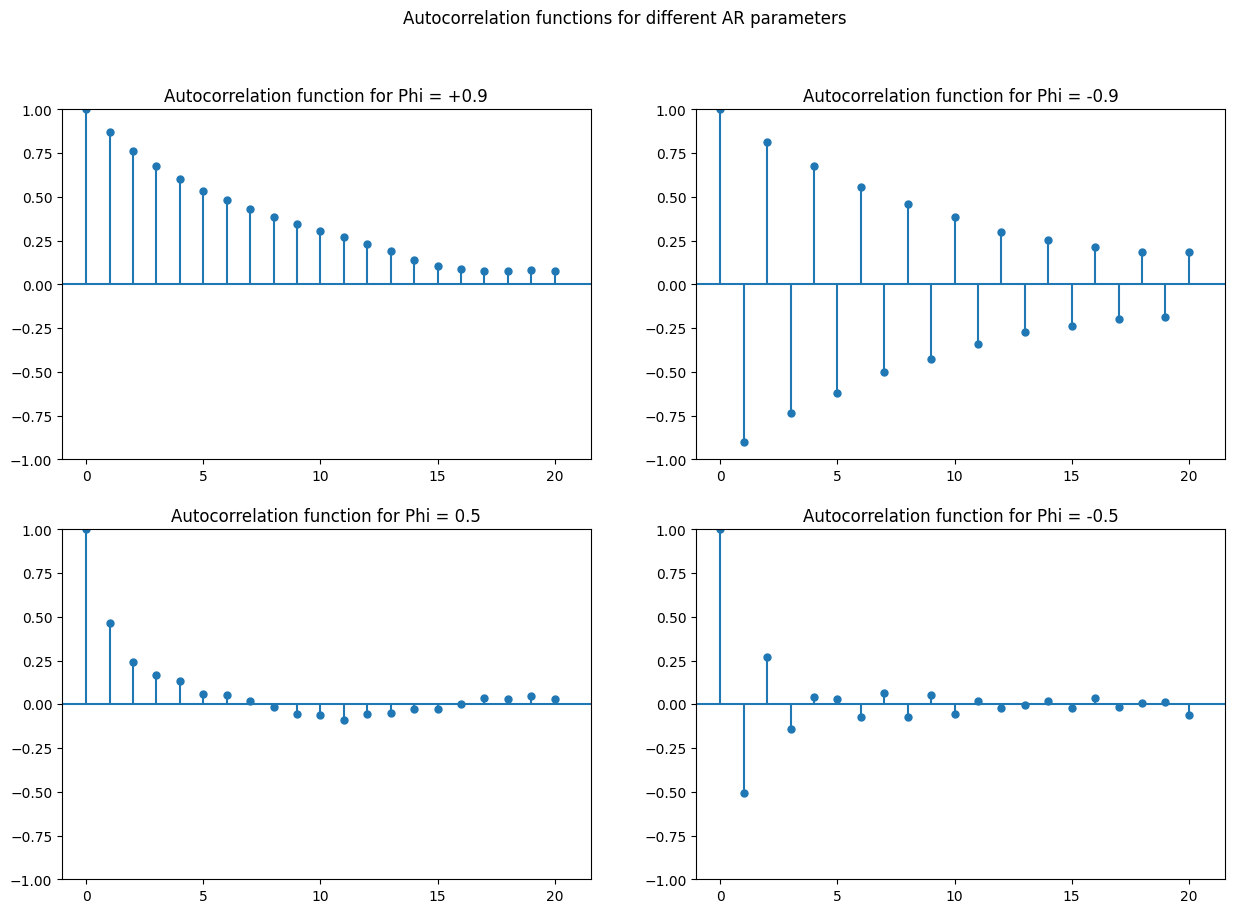

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Autocorrelation functions for different AR parameters')

# plot 1
plot_acf(simulated_data_1, alpha=1, lags=20, ax=axs[0,0], title='Autocorrelation function for Phi = +0.9')

# plot 2
plot_acf(simulated_data_2, alpha=1, lags=20, ax=axs[0,1], title='Autocorrelation function for Phi = -0.9')

# plot 3
plot_acf(simulated_data_3, alpha=1, lags=20, ax=axs[1,0], title='Autocorrelation function for Phi = 0.5')

# plot 4
plot_acf(simulated_data_4, alpha=1, lags=20, ax=axs[1,1], title='Autocorrelation function for Phi = -0.5')

In [59]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data_1, order=(1,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1411.323
Date:                Mon, 17 Oct 2022   AIC                           2828.647
Time:                        19:16:45   BIC                           2843.370
Sample:                             0   HQIC                          2834.243
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.242      0.618      0.537      -0.324       0.623
ar.L1          0.8703      0.016     55.264      0.000       0.839       0.901
sigma2         0.9835      0.046     21.335      0.0

/root/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


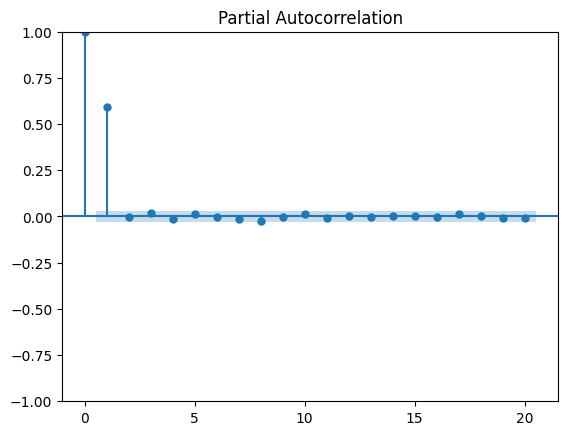

/root/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


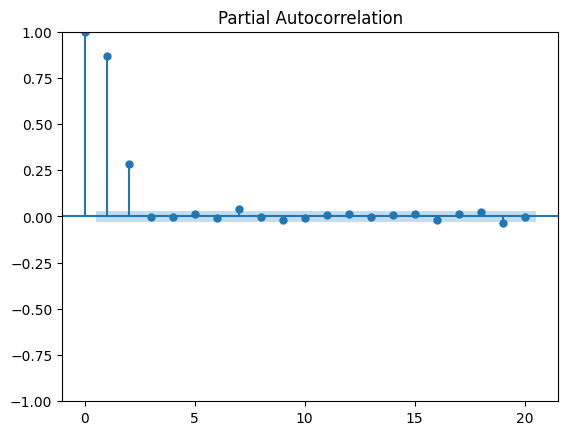

In [60]:
# PACF

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# AR(1) phi 0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

#AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# AR(2) phi1=.6, phi2=.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

In [61]:
mod = ARIMA(simulated_data_2, order=(2,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7116.439
Date:                Mon, 17 Oct 2022   AIC                          14240.878
Time:                        19:16:46   BIC                          14266.947
Sample:                             0   HQIC                         14250.015
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1234      0.151      0.816      0.415      -0.173       0.420
ar.L1          0.6197      0.014     44.856      0.000       0.593       0.647
ar.L2          0.2862      0.014     20.734      0.0

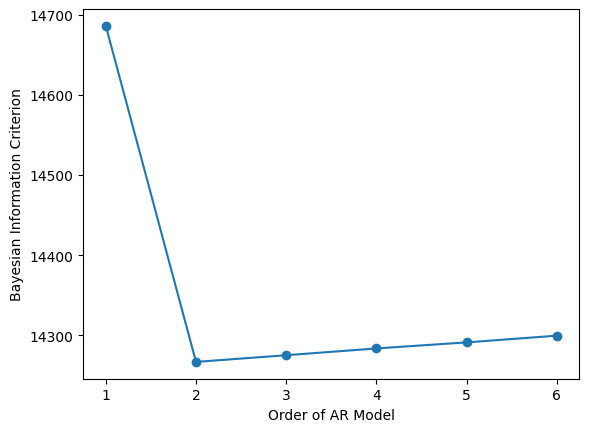

In [62]:
from statsmodels.tsa.arima.model import ARIMA

BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
    BIC[p] = res.bic
    
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

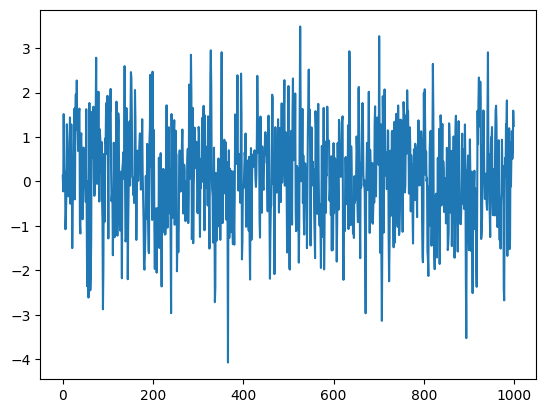

In [63]:
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

In [64]:
mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1408.055
Date:                Mon, 17 Oct 2022   AIC                           2822.110
Time:                        19:17:01   BIC                           2836.833
Sample:                             0   HQIC                          2827.706
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1001      0.047      2.141      0.032       0.008       0.192
ma.L1          0.4931      0.027     18.234      0.000       0.440       0.546
sigma2         0.9782      0.045     21.833      0.0

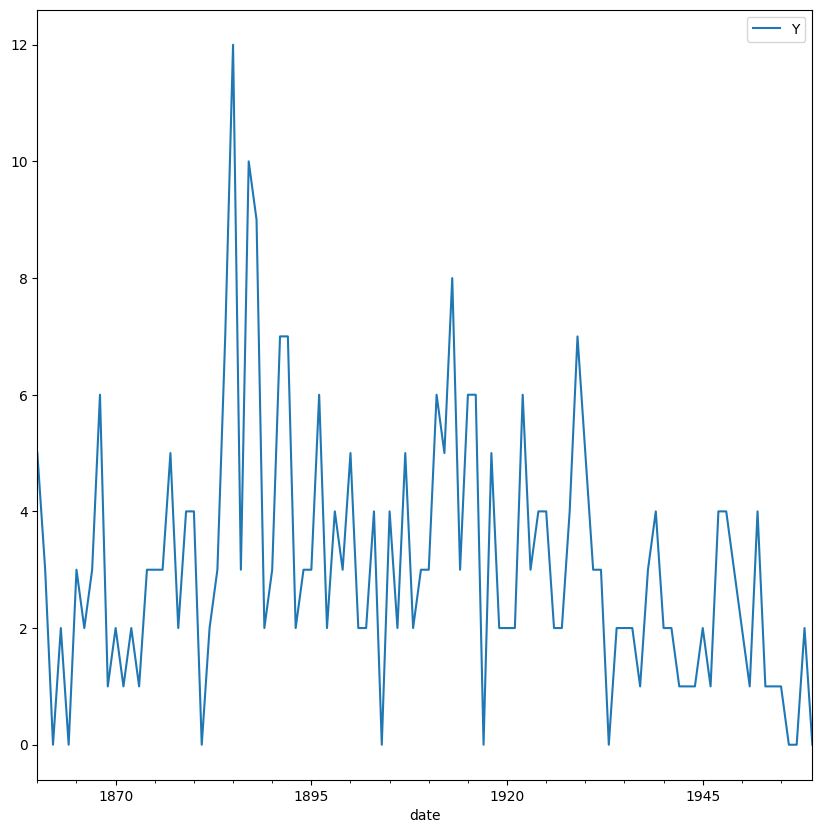

In [65]:
# visualizations
discoveries_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/discoveries.csv'
df = pd.read_csv(discoveries_url, parse_dates=['date'], index_col='date')
df.plot(figsize=(10,10))
plt.show()

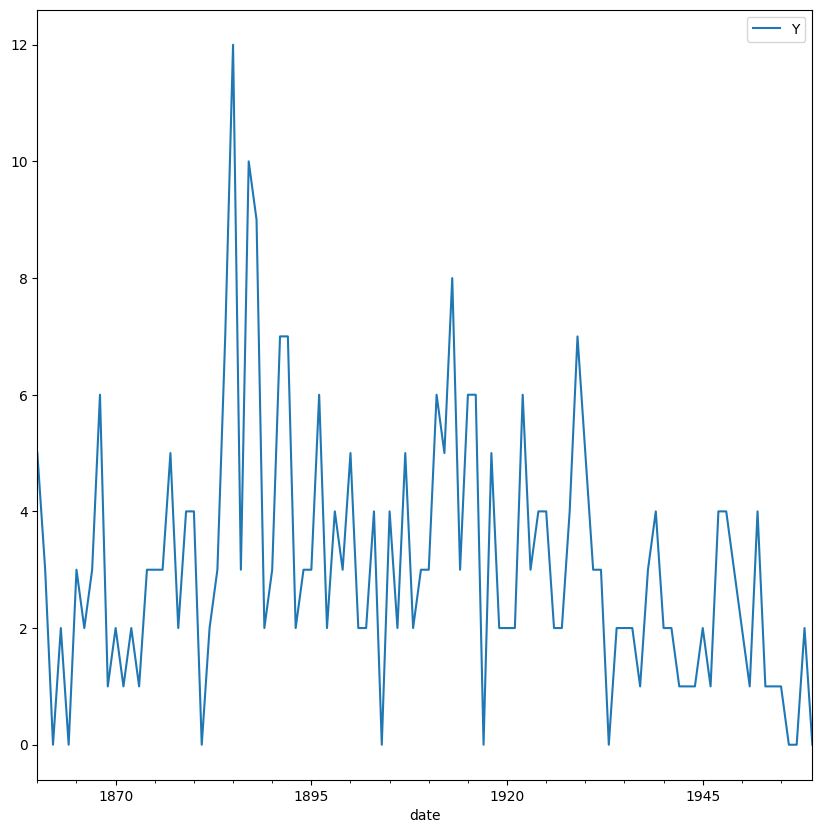

In [66]:
plt.style.use('fast')
df.plot(figsize=(10,10))
plt.show()

In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


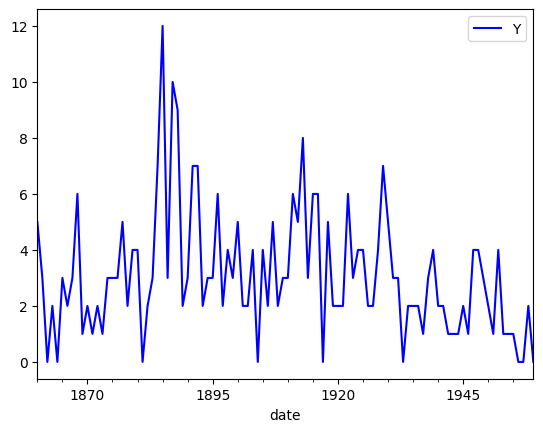

In [68]:
ax = df.plot(color='blue')

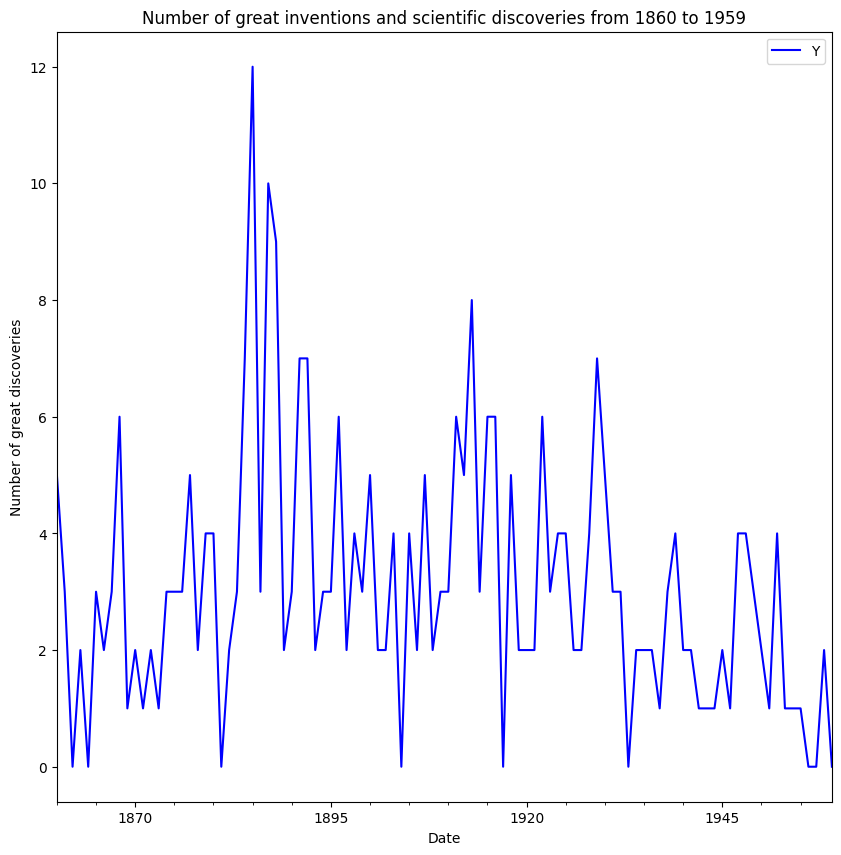

In [69]:
ax = df.plot(color='blue', figsize=(10,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959')
plt.show()

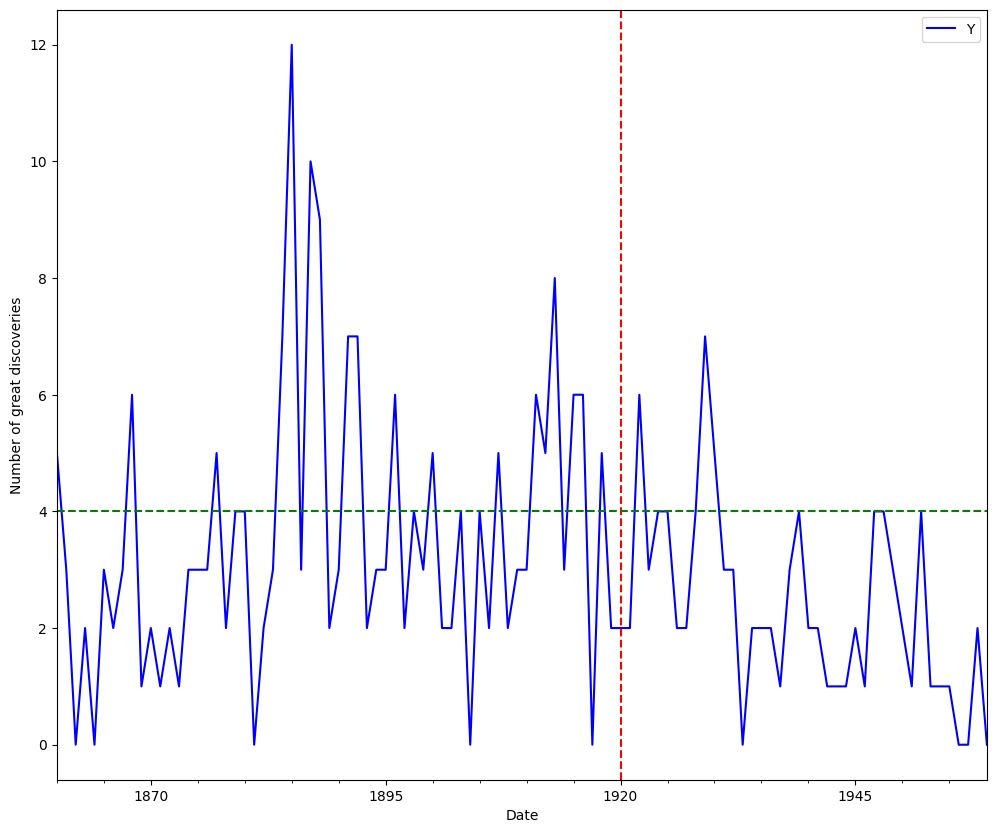

In [70]:
ax = df.plot(color='blue', figsize=(12,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.axvline('1920-01-01', color='red', linestyle='--')
ax.axhline(4, color='green', linestyle='--')

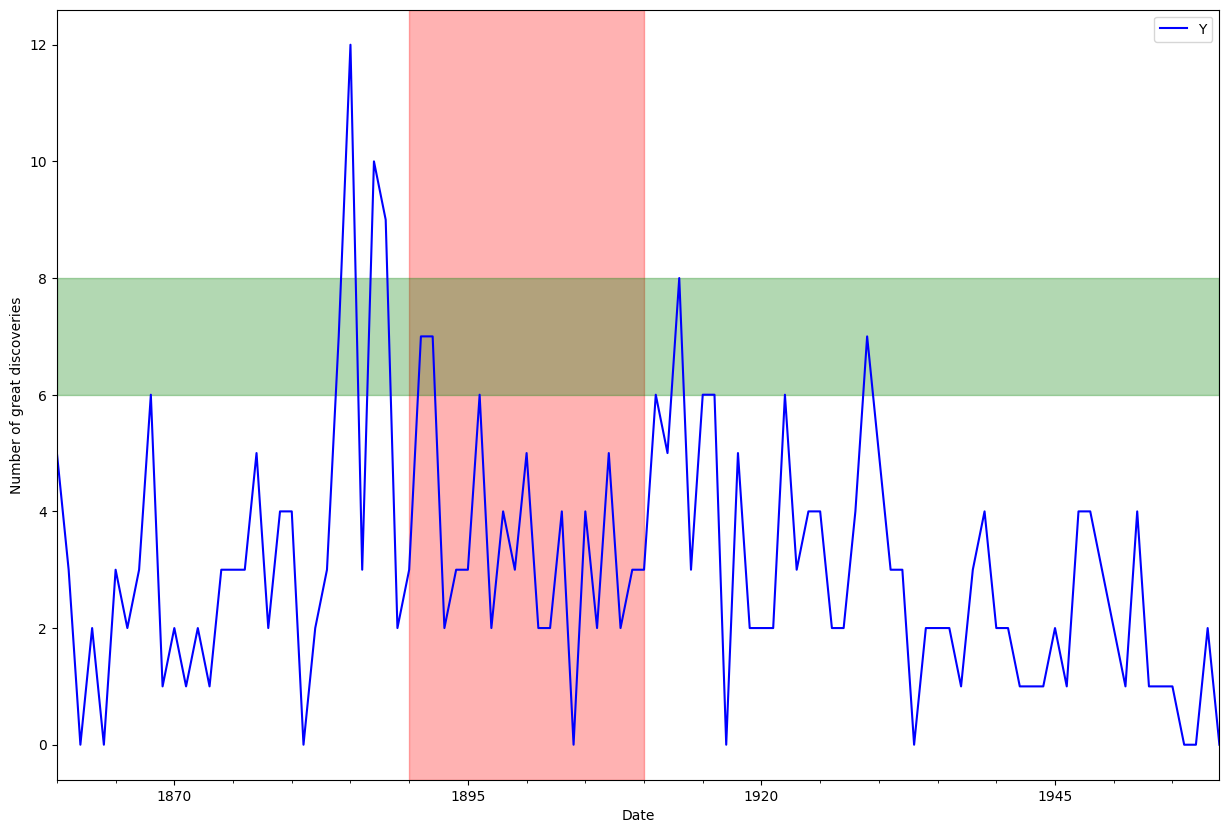

In [71]:
ax = df.plot(color='blue', figsize=(15,10))
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.axvspan('1890-01-01', '1910-01-01', color='red', alpha=0.3)
ax.axhspan(8, 6, color='green', alpha=0.3)

In [72]:
co2_levels_url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/co2_levels.csv'
co2_levels = pd.read_csv(co2_levels_url)
print(co2_levels.isnull().sum())

datestamp     0
co2          59
dtype: int64


In [73]:
co2_levels = co2_levels.fillna(method='bfill')

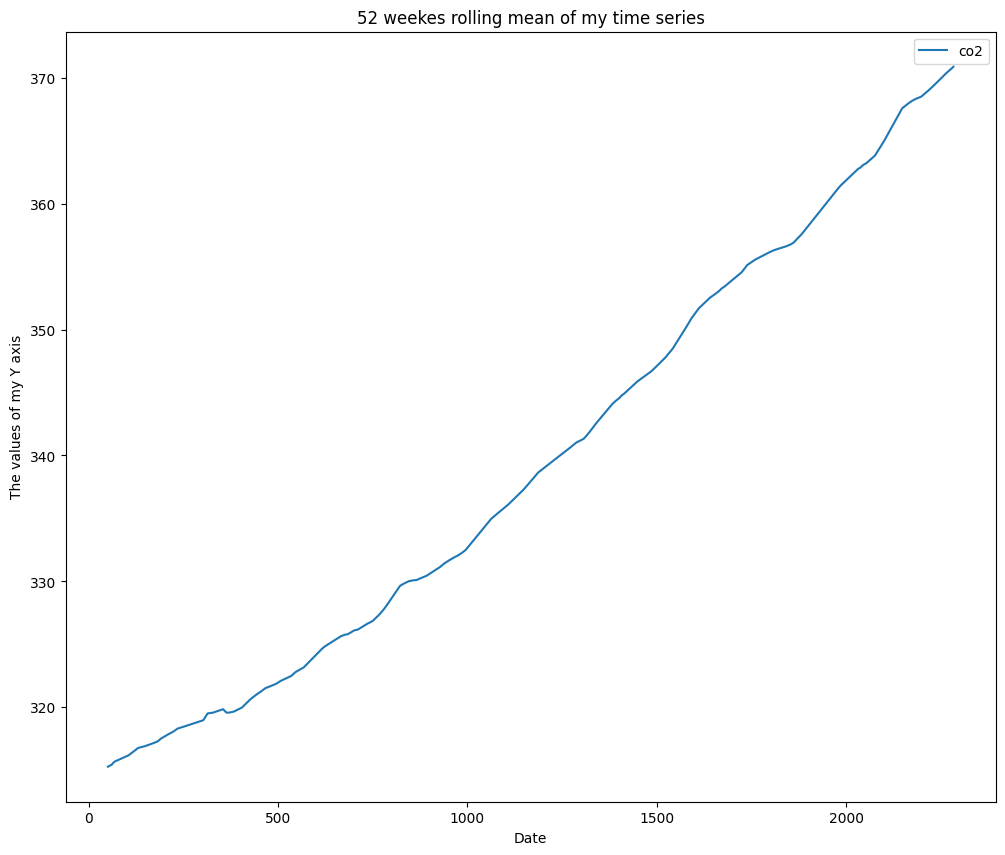

In [74]:
co2_levels_mean = co2_levels.rolling(window=52).mean()
ax = co2_levels_mean.plot(figsize=(12,10))
ax.set_xlabel('Date')
ax.set_ylabel('The values of my Y axis')
ax.set_title('52 weekes rolling mean of my time series')
plt.show()

Text(0.5, 1.0, 'Boxplot for the co2 levels data')

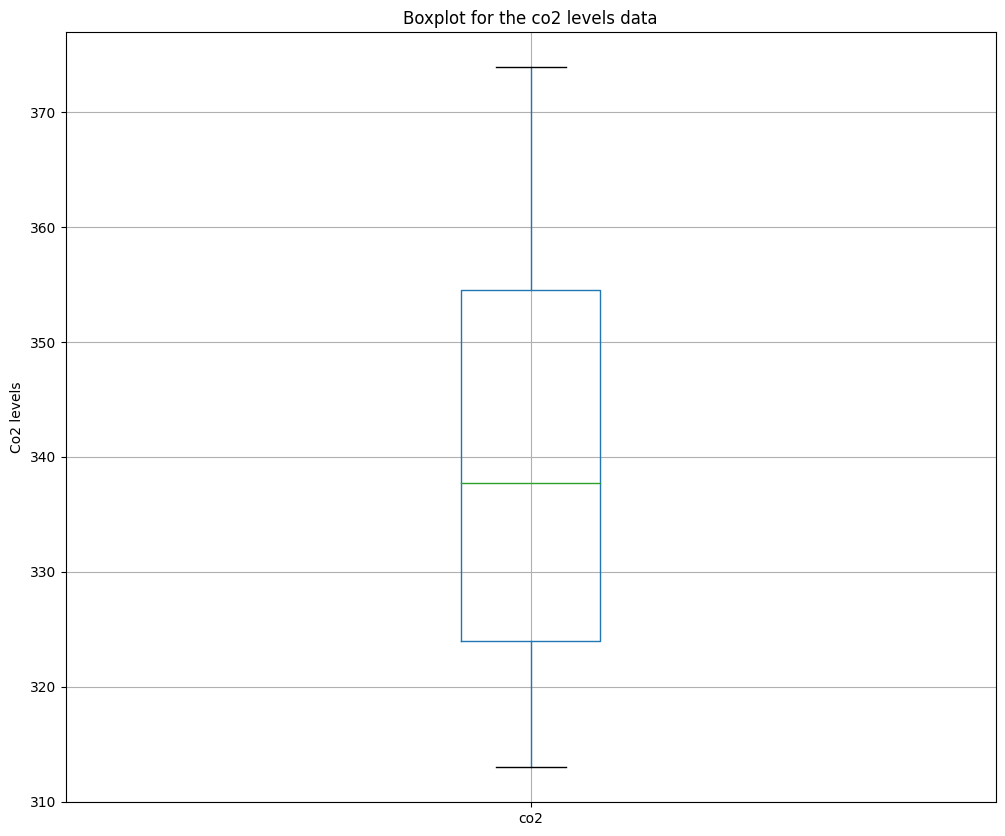

In [75]:
ax1 = co2_levels.boxplot(figsize=(12,10))
ax1.set_ylabel('Co2 levels')
ax1.set_title('Boxplot for the co2 levels data')

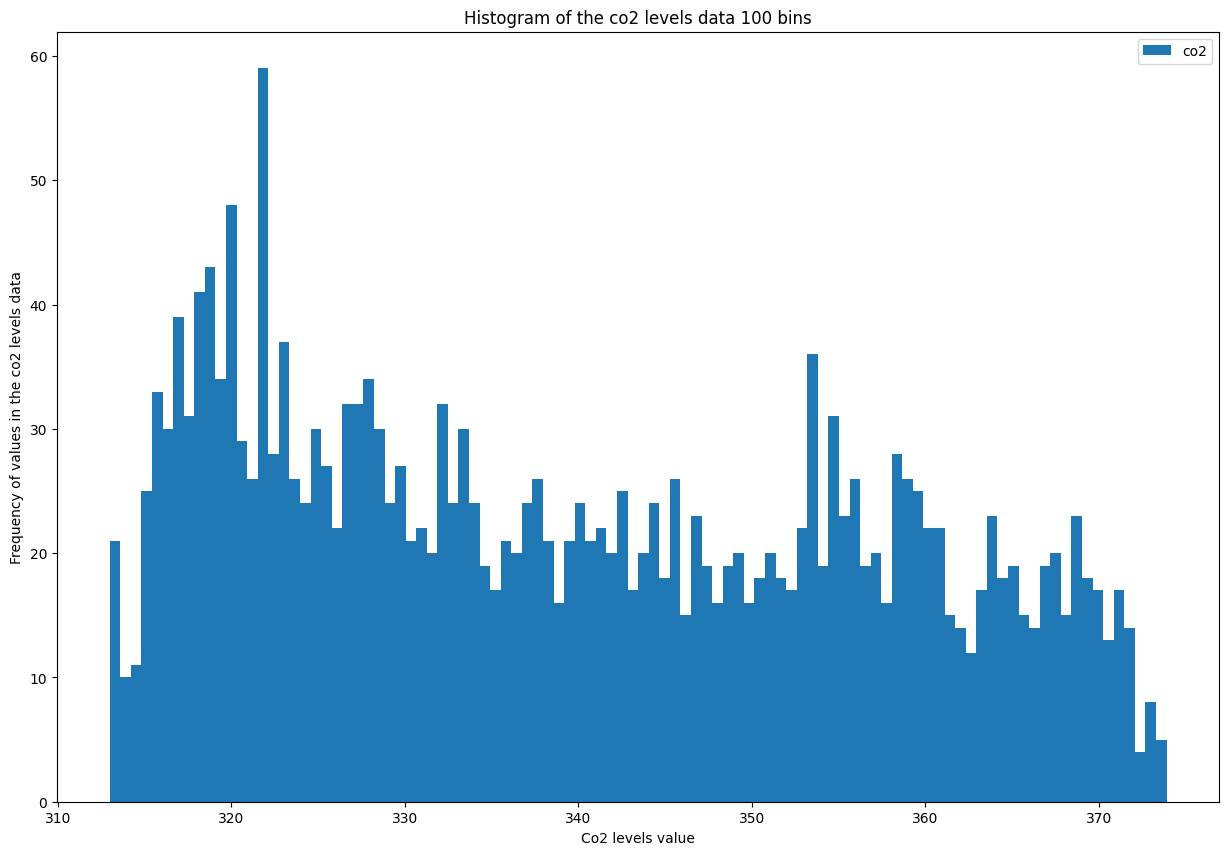

In [76]:
ax2 = co2_levels.plot(kind='hist', bins=100, figsize=(15,10))
ax2.set_xlabel('Co2 levels value')
ax2.set_ylabel('Frequency of values in the co2 levels data')
ax2.set_title('Histogram of the co2 levels data 100 bins')
plt.show()

Text(0.5, 1.0, 'Density plot of the co2 levels data')

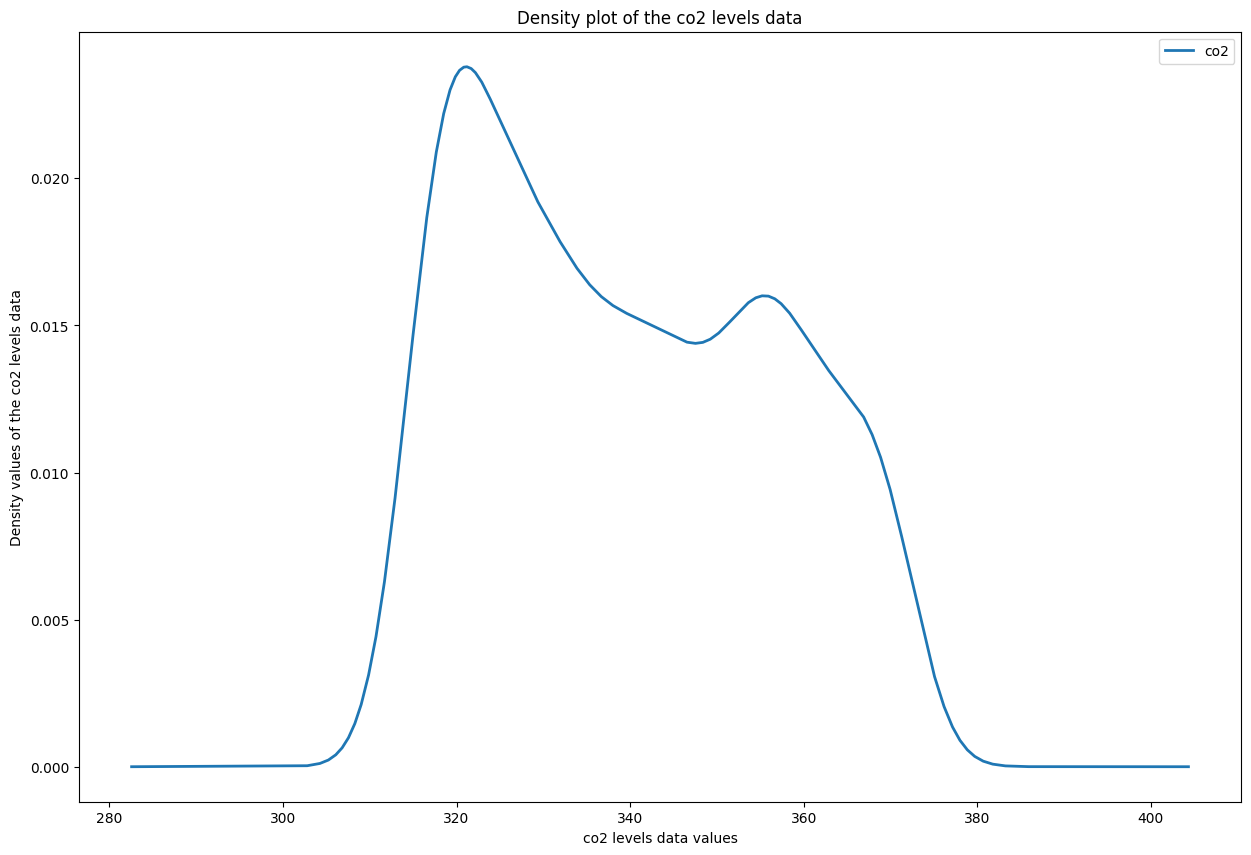

In [77]:
ax3 = co2_levels.plot(kind='density', linewidth=2, figsize=(15,10))
ax3.set_xlabel('co2 levels data values')
ax3.set_ylabel('Density values of the co2 levels data')
ax3.set_title('Density plot of the co2 levels data')

## 3. Seasonality, Trend, and Noise


### Autocorrelation and Partial Autocorrelation

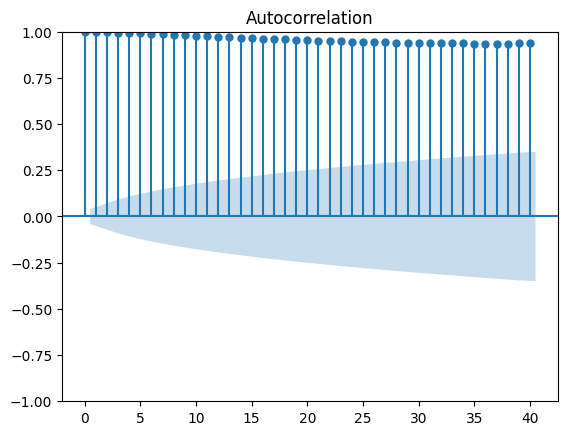

In [78]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(co2_levels['co2'], lags=40)
plt.show()

/root/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


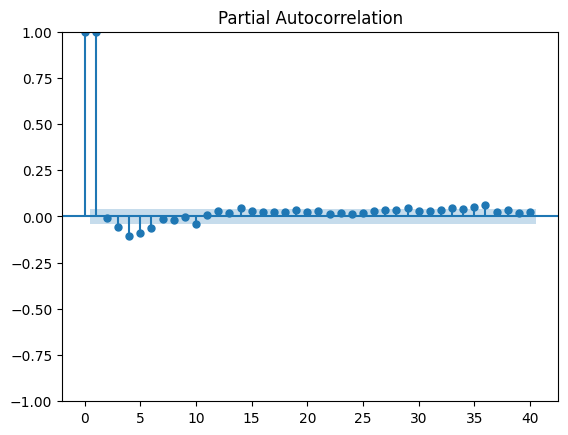

In [79]:
import matplotlib.pyplot as plt
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=40)
plt.show()

### Seasonality, trend and noise in time series data

### Visualizing Multiple Time Series

In [80]:
meat = pd.read_csv("https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Data%20Visualization/meat.csv", parse_dates=['date'], index_col='date')
print(meat.head(5))

             beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
date                                                                         
1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

            turkey  
date                
1944-01-01     NaN  
1944-02-01     NaN  
1944-03-01     NaN  
1944-04-01     NaN  
1944-05-01     NaN  


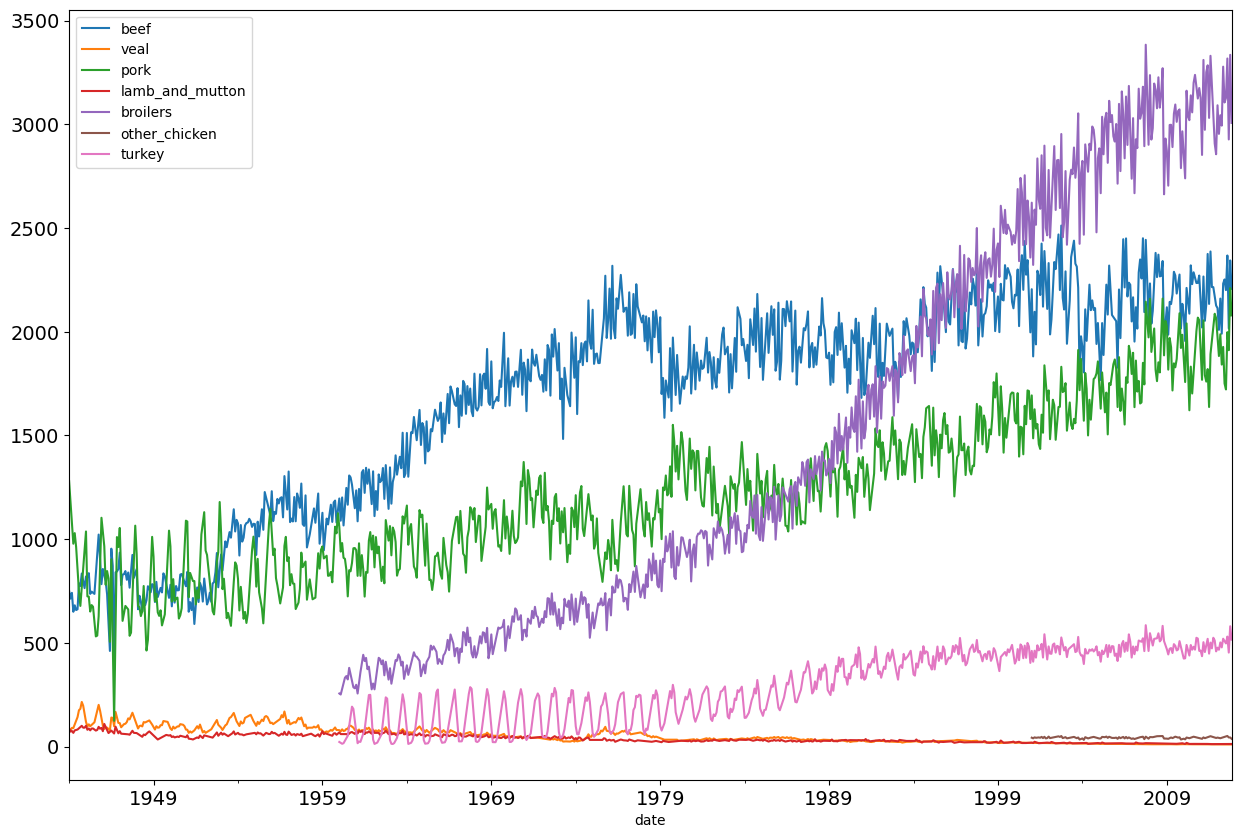

In [81]:
ax = meat.plot(figsize=(15, 10), fontsize=14)
plt.show()

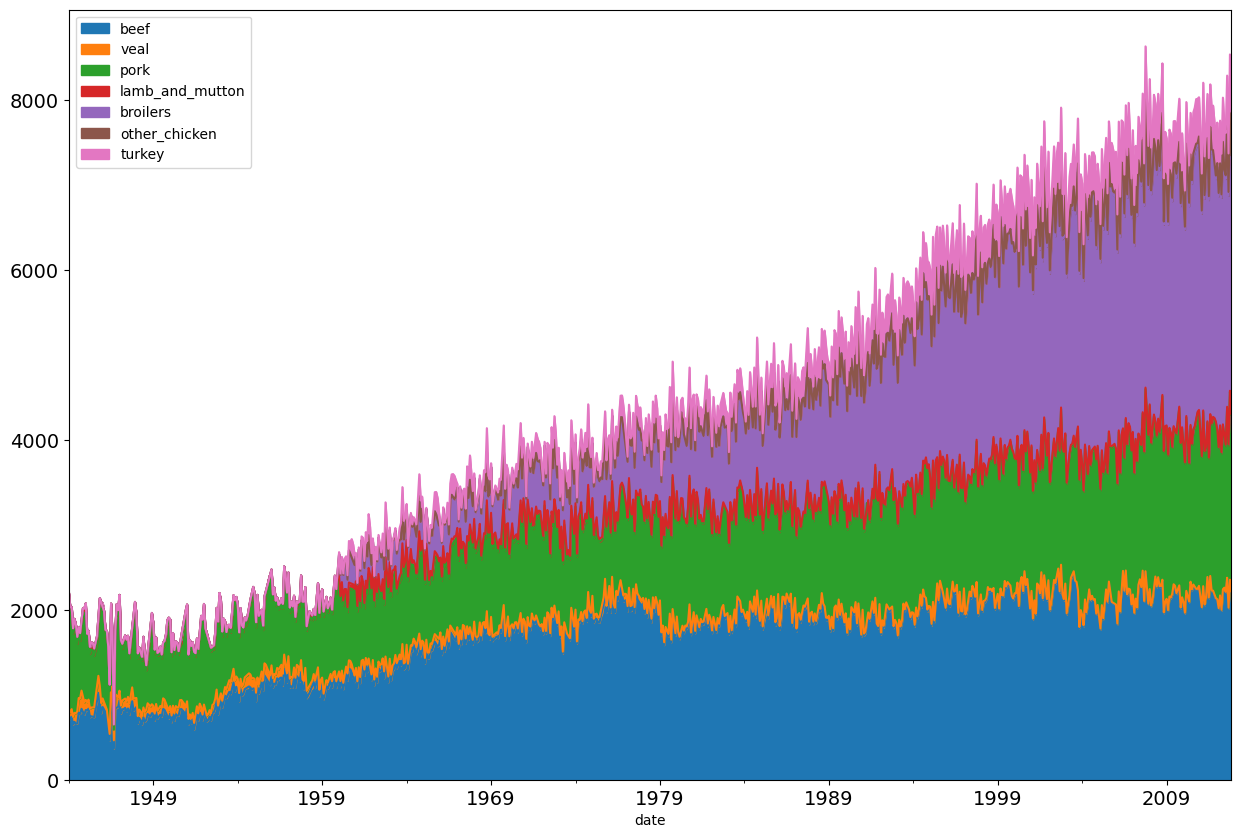

In [82]:
ax = meat.plot.area(figsize=(15, 10), fontsize=14)

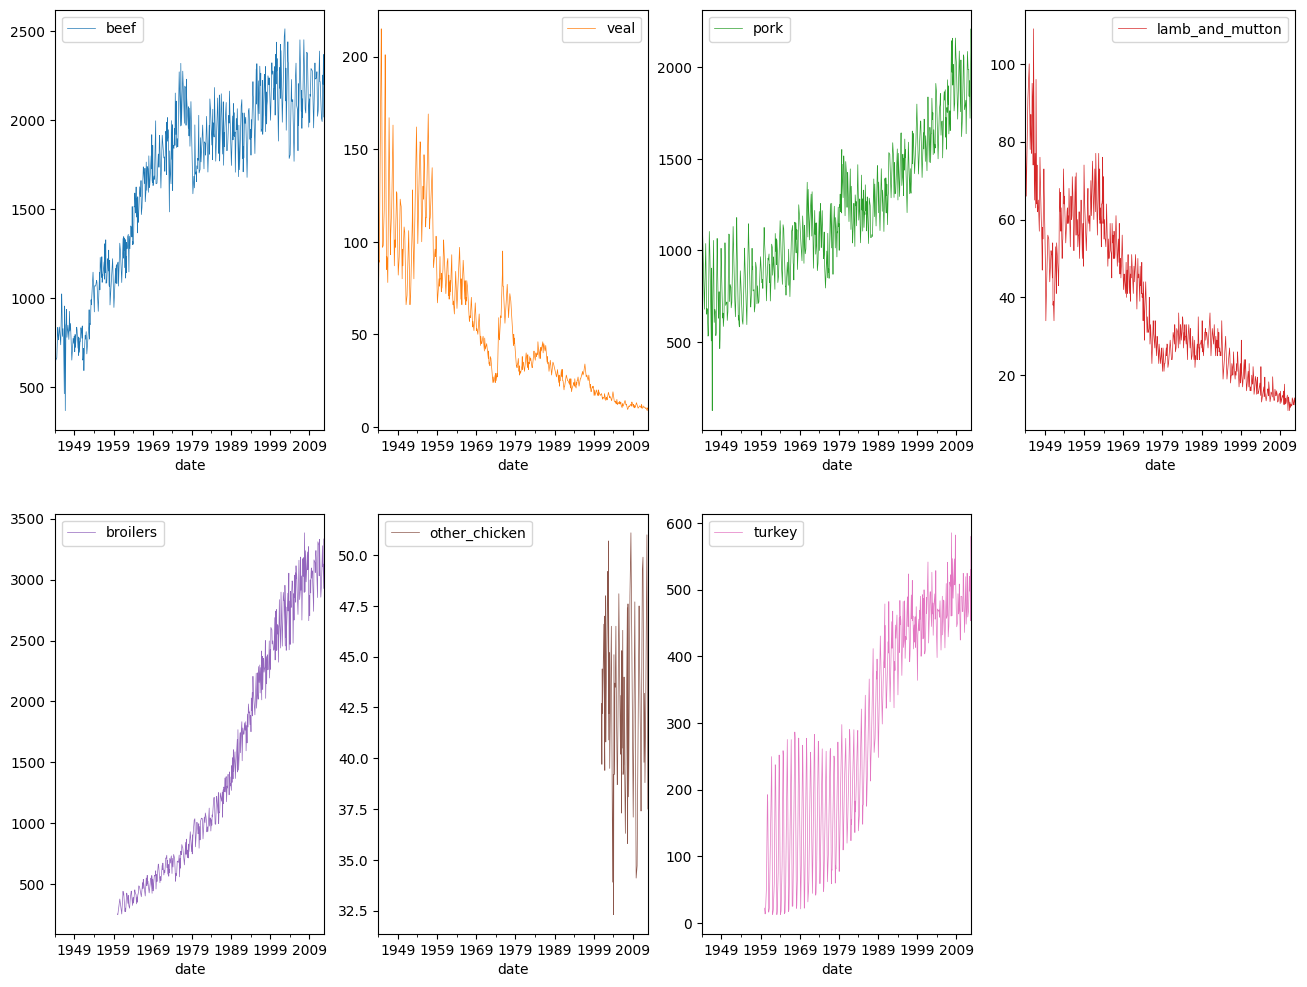

In [83]:
meat.plot(subplots=True,
        linewidth=0.5,
        layout=(2, 4),
        figsize=(16, 12),
        sharex=False,
        sharey=False)
plt.show()

In [84]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

corr_p = meat[['beef', 'veal','turkey']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)

corr_s = meat[['beef', 'veal','turkey']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

Pearson correlation matrix
            beef      veal    turkey
beef    1.000000 -0.829704  0.738070
veal   -0.829704  1.000000 -0.768366
turkey  0.738070 -0.768366  1.000000
Spearman correlation matrix
            beef      veal    turkey
beef    1.000000 -0.812437  0.778533
veal   -0.812437  1.000000 -0.829492
turkey  0.778533 -0.829492  1.000000
/tmp/ipykernel_81/1103723632.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/tmp/ipykernel_81/1103723632.py:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr
/tmp/ipykernel_81/1103723632.py:3: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


<AxesSubplot:>

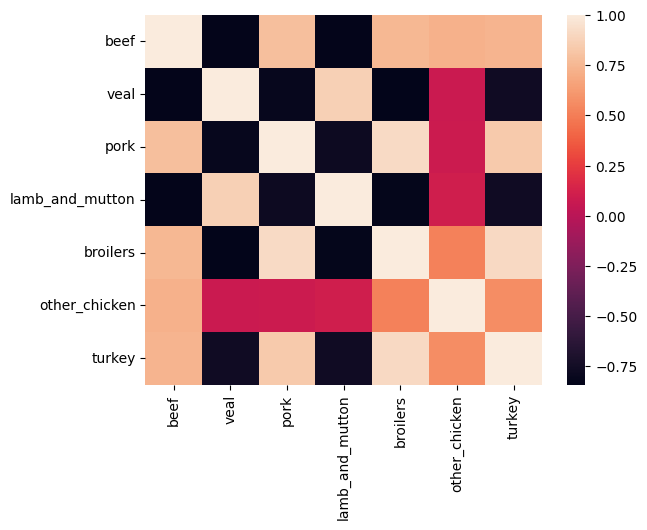

In [85]:
import seaborn as sns
corr_mat = meat.corr(method='pearson')
sns.heatmap(corr_mat)

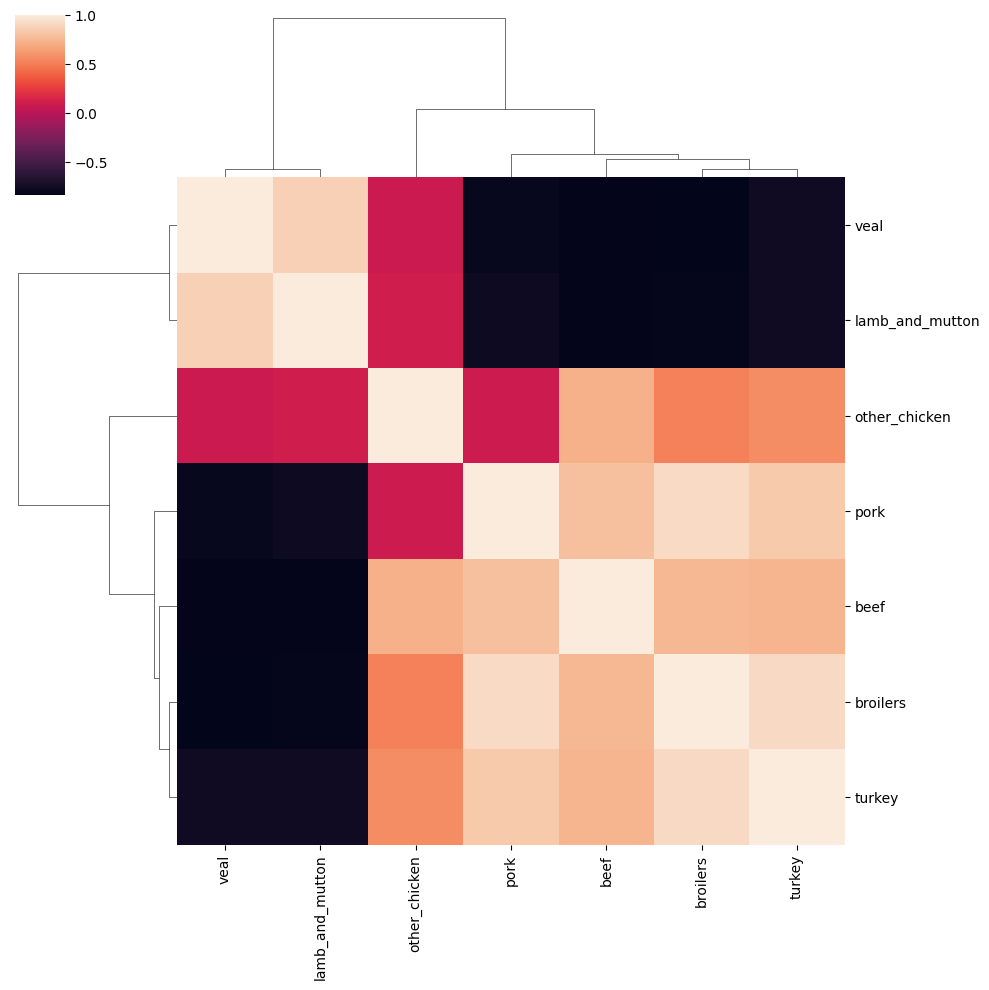

In [86]:
sns.clustermap(corr_mat)


# Arma models

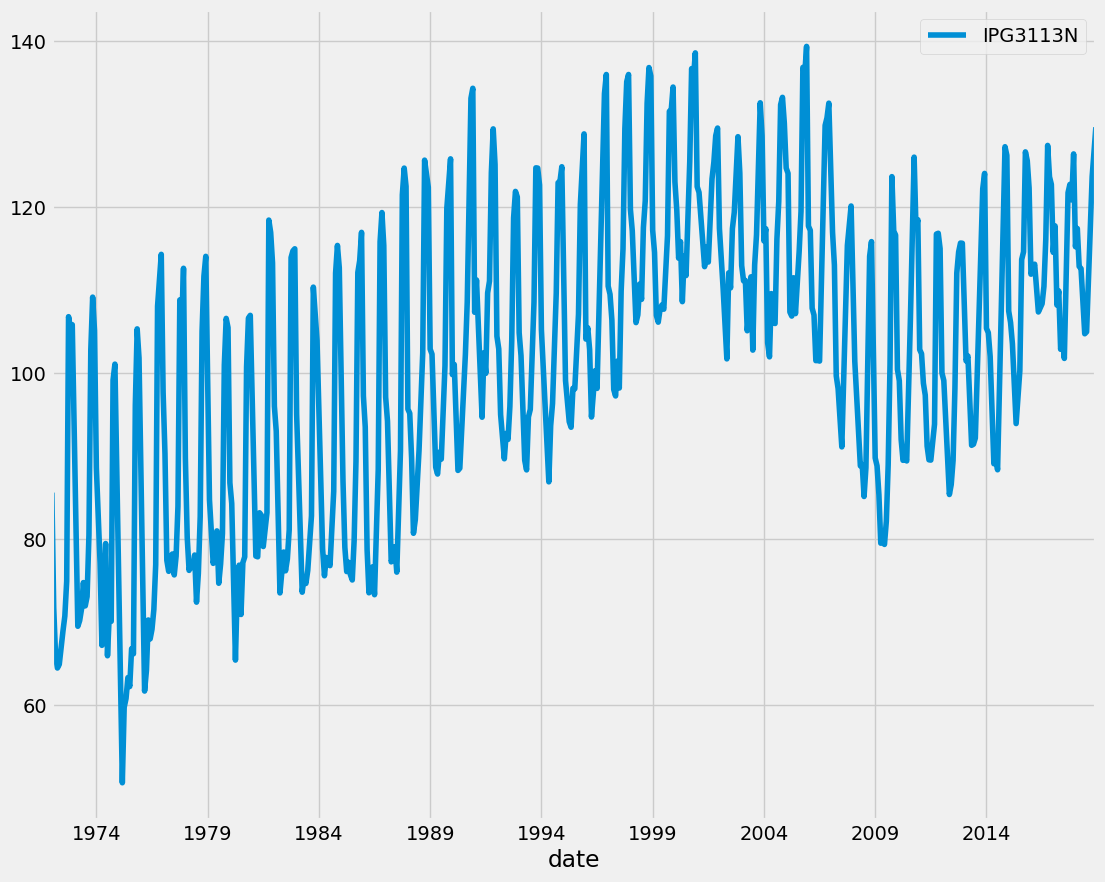

In [87]:
url = 'https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Arima%20Models%20in%20Python/candy_production.csv'
candy = pd.read_csv(url, 
            index_col='date',
            parse_dates=True)
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12,10))
plt.show()

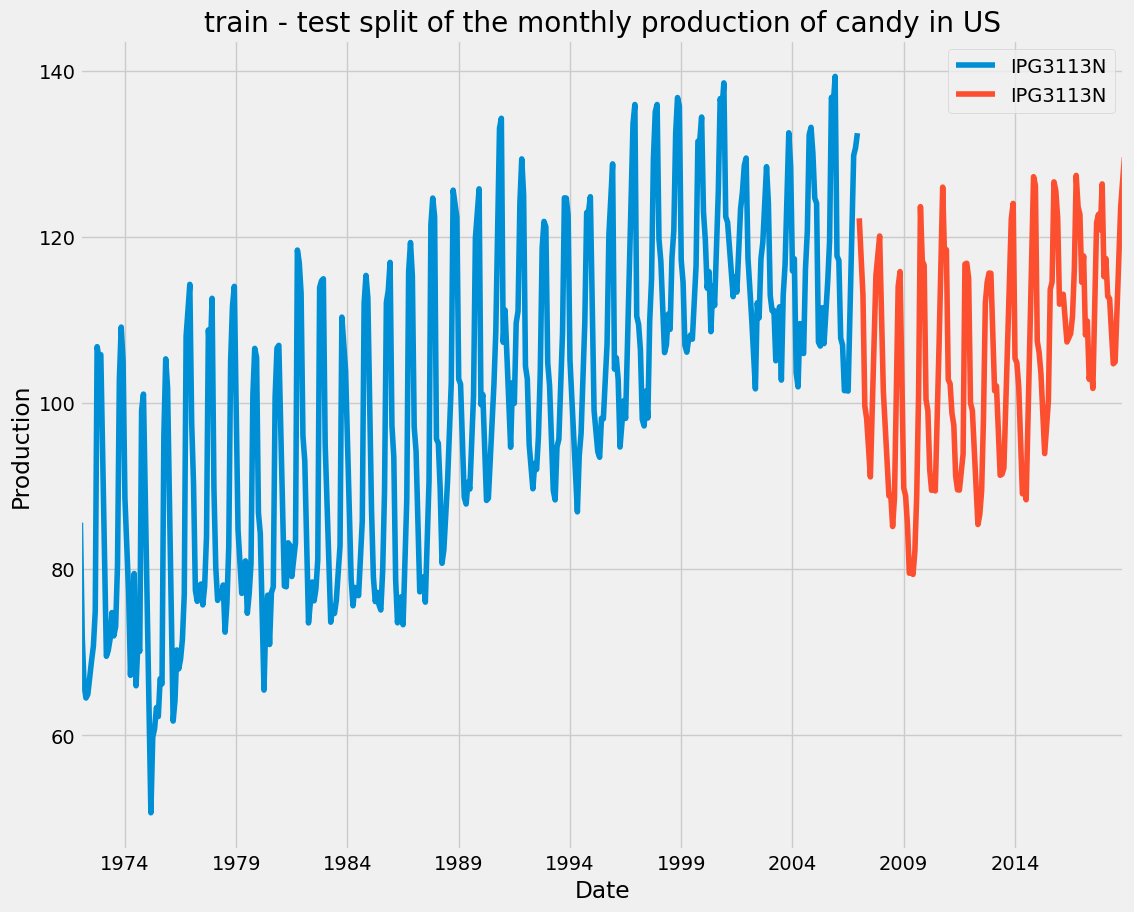

In [88]:
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

fig, ax = plt.subplots()

candy_train.plot(ax=ax, figsize=(12,10))
candy_test.plot(ax=ax)
plt.title('train - test split of the monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [89]:
results = adfuller(candy)
print(results)

(-1.77601530750161, 0.3924327500714003, 14, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3094.828881317046)


In [90]:
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()
result_diff = adfuller(candy_diff)
print(result_diff)

(-6.1759124897557065, 6.631549159333836e-08, 13, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3091.3123583091397)


NameError: name 'plt' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6c63703-762d-48f4-8387-054fe9644d63' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>